Jerónimo Aranda Barois 150344 a 27 de agosto de 2019
# Estadística Aplicada 3: titanic
## Análisis exploratorio

Primero importamos los paquetes más importantes:

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model
import seaborn as sns

Nos aseguramos que el archivo de datos se encuentre en el mismo directorio en el que este notebook se encuentra:

In [6]:
os.listdir()

['indice_marginacion.csv',
 '.DS_Store',
 'marginacion.ipynb',
 'titanic3.xls',
 '.ipynb_checkpoints',
 '.git',
 'Diccionario_mun (1).pdf',
 'titanic.ipynb',
 'titanic3.csv']

Procedemos a leer el archivo csv de datos y a visualizar sus primeros 5 elementos junto con algunas de sus columnas. 

In [22]:
df=pd.read_csv('titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [9]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora averigüemos la cantidad de registros y columnas que el data frame posee:

In [10]:
df.shape

(1310, 14)

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

En la siguiente línea podemos ver los tipos de las variables en cada columna.

In [12]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Veamos un resumen del dataset:

In [13]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [26]:
sexo_to_numeric={'female':0,'male':1}
df['sexo_numeric']=df['sex'].map(sexo_to_numeric)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sexo_numeric
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0


A continuación se hace una gráfica de todas las observaciones de la población por municipios por estado.

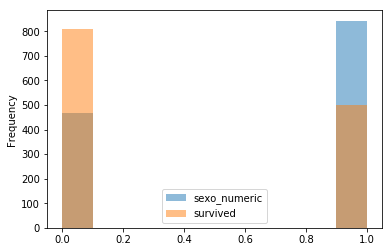

In [68]:
df[['sexo_numeric','survived']].plot.hist(alpha=.5)